In [15]:
import numpy as np
import pandas as pd
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for temp in range(len(X)):
      predicted_output = prediction(X[temp],W,b)
      #If the point is misclassified and belongs to positive area
      if (y[temp] != predicted_output) and (predicted_output == 0):
        for i in range(len(X[temp])):
          W[i] += X[temp][i]*learn_rate
          b += learn_rate
      elif (y[temp] != predicted_output) and (predicted_output == 1):
        for i in range(len(X[temp])):
          W[i] -= X[temp][i]*learn_rate
          b -= learn_rate
    return W, b

# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

data.type: <class 'numpy.ndarray'> <built-in method reshape of numpy.ndarray object at 0x7939f937b4b0>


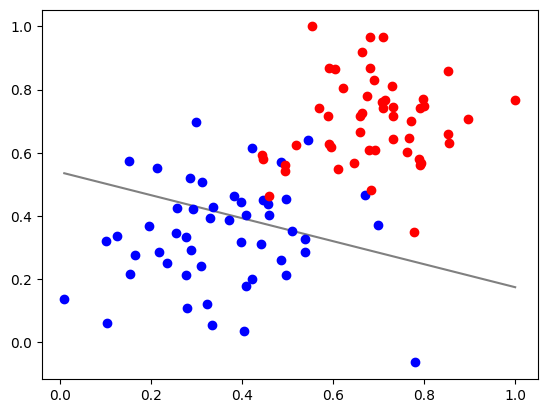

In [17]:
if __name__ == "__main__" :
    # perform perceptron
    data = np.loadtxt( '/content/data.csv' , delimiter = ',' )
    print ( "data.type:" , type (data),data.reshape)
    X = data[:,:- 1 ]
    y = data[:,- 1 ]
    regression_coef = trainPerceptronAlgorithm(X, y) #Return multiple sets of coefficients in the training process

    # plot the results
    import matplotlib.pyplot as plt

    plt.figure()
    X_ = data[:, 0 ]
    y_ = data[:, 1 ]

    data1 = [x for x in data if x[ 2 ] > 0 ]
    data0 = [x for x in data if x[ 2 ] == 0 ]

    X_min = X_.min ( )
    X_max = X_.max ( )

    data0_ = np.array(data0)
    X0_ = data0_[:, 0 ]
    Y0_ = data0_[:, 1 ]
    data1_ = np.array(data1)
    X1_ = data1_[:, 0 ]
    Y1_ = data1_[:, 1 ]


    plt.scatter(X1_, Y1_, zorder = 3 , c= 'b' )
    plt.scatter(X0_, Y0_, zorder = 3 , c= 'r' )



    counter = len (regression_coef)
    #print(regression_coef)
    W, b = regression_coef[- 1 ]

    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color=[ 0.5 , 0.5 , 0.5 ])
